In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF

In [7]:
archivo = "HortonGeneralHospital_2.csv"
df = pd.read_csv(archivo)
df['mes_año_datetime'] = pd.to_datetime(df['mes_año'])

In [8]:
datos_ratio_conBen = df.ratio
datos_ratio_hasta_noviembre2003 = df.ratio[:49]
datos_ratio_desde_marzo2004 = df.ratio[52:]
datos_ratio_sinBen = pd.concat([datos_ratio_hasta_noviembre2003, datos_ratio_desde_marzo2004])

datos_ratio_sinBen.to_csv("datos_procesados_sinBen.csv", sep = ',', index= False)

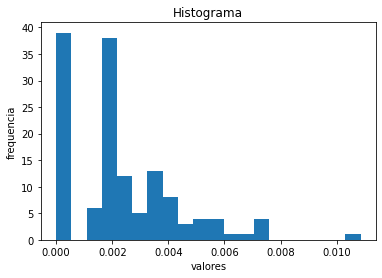

In [11]:
# Graficando histograma
mu, sigma = 0, 0.2 # media y desvio estandar
#datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos_ratio_conBen, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

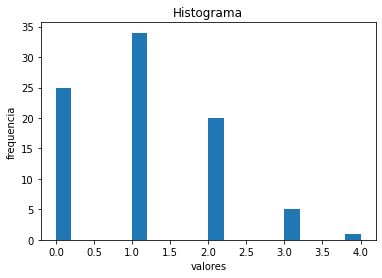

In [12]:
# Graficando histograma
mu, sigma = 0, 0.2 # media y desvio estandar
#datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos_n_transferidos_desde_marzo2004, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

In [14]:
from  scipy.stats import chisquare

hist_total, bin_edges_total = np.histogram(datos_ratio_conBen, 5)
print(bin_edges_total)
print(hist_total)
chisquare(hist_total)

[0.         0.00216998 0.00433996 0.00650995 0.00867993 0.01084991]
[83 38 12  5  1]


Power_divergenceResult(statistic=166.863309352518, pvalue=4.927175806689634e-35)

---------------------
Resultados del ajuste
---------------------
Distribución:   uniform
Dominio:        [0.0, 1.0]
Parámetros:     {'loc': 0.0, 'scale': 0.01084991}
Log likelihood: 628.7801906605716
AIC:            -1253.5603813211433
BIC:            -1247.691433454882


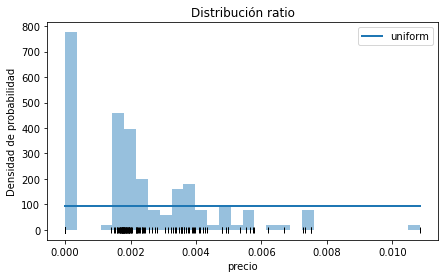

In [15]:
datos = datos_ratio_conBen
# Ajuste distribución uniforme
#===============================================================================
# 1) Se define el tipo de distribución
distribucion = stats.uniform

# 2) Con el método fit() se obtienen los parámetros
parametros = distribucion.fit(data=datos)

# 3) Se crea un diccionario que incluya el nombre de cada parámetro
nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                     if not p=='x'] + ["loc","scale"]
parametros_dict = dict(zip(nombre_parametros, parametros))

# 3) Se calcula el log likelihood
log_likelihood = distribucion.logpdf(datos.to_numpy(), *parametros).sum()

# 4) Se calcula el AIC y el BIC
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos.shape[0]) * len(parametros)

# 5) Gráfico
x_hat = np.linspace(min(datos), max(datos), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos, np.full_like(datos, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución ratio')
ax.set_xlabel('precio')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

#6) Información del ajuste
print('---------------------')
print('Resultados del ajuste')
print('---------------------')
print(f"Distribución:   {distribucion.name}")
print(f"Dominio:        {[distribucion.a, distribucion.b]}")
print(f"Parámetros:     {parametros_dict}")
print(f"Log likelihood: {log_likelihood}")
print(f"AIC:            {aic}")
print(f"BIC:            {bic}")

---------------------
Resultados del ajuste
---------------------
Distribución:   uniform
Dominio:        [0.0, 1.0]
Parámetros:     {'loc': 0.0, 'scale': 0.007518797}
Log likelihood: 665.0874813021585
AIC:            -1326.174962604317
BIC:            -1320.3496528328449


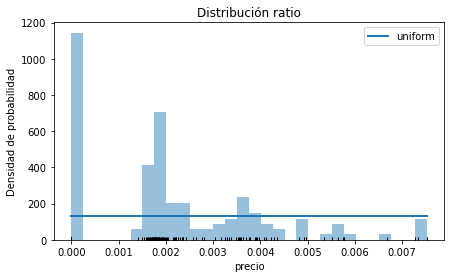

In [19]:
datos = datos_ratio_sinBen
# Ajuste distribución uniforme
#===============================================================================
# 1) Se define el tipo de distribución
distribucion = stats.uniform

# 2) Con el método fit() se obtienen los parámetros
parametros = distribucion.fit(data=datos)

# 3) Se crea un diccionario que incluya el nombre de cada parámetro
nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                     if not p=='x'] + ["loc","scale"]
parametros_dict = dict(zip(nombre_parametros, parametros))

# 3) Se calcula el log likelihood
log_likelihood = distribucion.logpdf(datos.to_numpy(), *parametros).sum()

# 4) Se calcula el AIC y el BIC
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos.shape[0]) * len(parametros)

# 5) Gráfico
x_hat = np.linspace(min(datos), max(datos), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos, np.full_like(datos, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución ratio')
ax.set_xlabel('precio')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

#6) Información del ajuste
print('---------------------')
print('Resultados del ajuste')
print('---------------------')
print(f"Distribución:   {distribucion.name}")
print(f"Dominio:        {[distribucion.a, distribucion.b]}")
print(f"Parámetros:     {parametros_dict}")
print(f"Log likelihood: {log_likelihood}")
print(f"AIC:            {aic}")
print(f"BIC:            {bic}")

---------------------
Resultados del ajuste
---------------------
Distribución:   uniform
Dominio:        [0.0, 1.0]
Parámetros:     {'loc': 0.0, 'scale': 0.007272727}
Log likelihood: 418.50803614156325
AIC:            -833.0160722831265
BIC:            -828.1307697701459


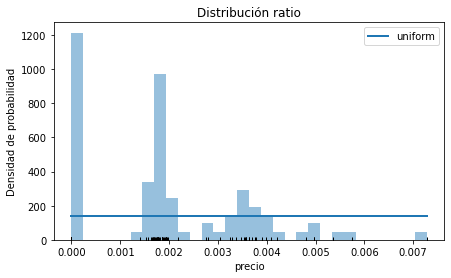

In [17]:
datos = datos_ratio_desde_marzo2014
# Ajuste distribución uniforme
#===============================================================================
# 1) Se define el tipo de distribución
distribucion = stats.uniform

# 2) Con el método fit() se obtienen los parámetros
parametros = distribucion.fit(data=datos)

# 3) Se crea un diccionario que incluya el nombre de cada parámetro
nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                     if not p=='x'] + ["loc","scale"]
parametros_dict = dict(zip(nombre_parametros, parametros))

# 3) Se calcula el log likelihood
log_likelihood = distribucion.logpdf(datos.to_numpy(), *parametros).sum()

# 4) Se calcula el AIC y el BIC
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos.shape[0]) * len(parametros)

# 5) Gráfico
x_hat = np.linspace(min(datos), max(datos), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos, np.full_like(datos, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución ratio')
ax.set_xlabel('precio')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

#6) Información del ajuste
print('---------------------')
print('Resultados del ajuste')
print('---------------------')
print(f"Distribución:   {distribucion.name}")
print(f"Dominio:        {[distribucion.a, distribucion.b]}")
print(f"Parámetros:     {parametros_dict}")
print(f"Log likelihood: {log_likelihood}")
print(f"AIC:            {aic}")
print(f"BIC:            {bic}")